In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def test_cuts(x, col, thr, n=4):
    display(pd.cut(x[x[col] < thr][col], bins=n).value_counts(sort=False))
    display(pd.qcut(x[x[col] < thr][col], q=n).value_counts(sort=False))

In [3]:
orig_df = pd.read_csv('../../state_CA.csv').drop_duplicates()

/tmp/ipykernel_125179/3013834244.py:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  orig_df = pd.read_csv('../../state_CA.csv').drop_duplicates()


In [4]:
df = orig_df.drop(
    [
        "activity_year",
        "lei",
        "derived_msa-md",
        "state_code",
        "census_tract",
        "aus-2",
        "aus-3",
        "aus-4",
        "aus-5",
        "denial_reason-1",
        "denial_reason-2",
        "denial_reason-2",
        "denial_reason-3",
        "denial_reason-4",
        "reverse_mortgage",
        "hoepa_status",
        "negative_amortization",
        "derived_dwelling_category",
        "other_nonamortizing_features",
        "manufactured_home_secured_property_type",
        "manufactured_home_land_property_interest",
        "initially_payable_to_institution",
    ],
    axis = 1
)
df = df.drop([x for x in df.columns if x.endswith('observed')], axis=1)
# df = df.drop([x for x in df.columns if 'tract' in x or 'ffiec' in x], axis=1)
df = df[df != 'Exempt']

In [5]:
# 1 - Loan originated
# 2 - Application approved but not accepted
# 3 - Application denied
# 4 - Application withdrawn by applicant
# 5 - File closed for incompleteness
# 6 - Purchased loan
# 7 - Preapproval request denied
# 8 - Preapproval request approved but not accepted
display(df['action_taken'].value_counts())
df = df[df['action_taken'].isin([1, 3])]
df["action_taken"] = df["action_taken"].map({1: 'Approved', 3: 'Denied'})
display(df['action_taken'].value_counts())

action_taken
1    798306
3    242203
4    233023
6    145043
5     85203
2     40347
8      4469
7      1409
Name: count, dtype: int64

action_taken
Approved    798306
Denied      242203
Name: count, dtype: int64

In [6]:
# 1 - Male
# 2 - Female
# 3 - Information not provided by applicant in mail, internet, or telephone application
# 4 - Not applicable
# 6 - Applicant selected both male and female
display(df['applicant_sex'].value_counts())
df = df[df['applicant_sex'].isin([1, 2])]
df['applicant_sex'] = df['applicant_sex'].map({1: 'Male', 2: 'Female'})
display(df['applicant_sex'].value_counts())

applicant_sex
1    604047
2    321530
3     94910
4     19197
6       825
Name: count, dtype: int64

applicant_sex
Male      604047
Female    321530
Name: count, dtype: int64

In [7]:
# 1 - Male
# 2 - Female
# 3 - Information not provided by applicant in mail, internet, or telephone application
# 4 - Not applicable
# 5 - no co-applicant
# 6 - Applicant selected both male and female
display(df['co-applicant_sex'].value_counts())
df = df[df['co-applicant_sex'].isin([1, 2, 5])]
df['co-applicant_sex'] = df['co-applicant_sex'].map({1: 'Male', 2: 'Female', 5: 'no_coapplicant'})
display(df['co-applicant_sex'].value_counts())

co-applicant_sex
5    494132
2    290533
1    128903
3      9434
4      2237
6       338
Name: count, dtype: int64

co-applicant_sex
no_coapplicant    494132
Female            290533
Male              128903
Name: count, dtype: int64

In [8]:
# Loan type - keeping 1/2/3
# 1 - Conventional (not insured or guaranteed by FHA, VA, RHS, or FSA)
# 2 - Federal Housing Administration insured (FHA)
# 3 - Veterans Affairs guaranteed (VA)
# 4 - USDA Rural Housing Service or Farm Service Agency guaranteed (RHS or FSA)
display(df['loan_type'].value_counts())
df["loan_type"] = df["loan_type"].map(
    {1: "Conventional", 2: "FHA", 3: "VA", 4: "RHS/FSA"}
)
df = df[df["loan_type"] != "RHS/FSA"]
display(df['loan_type'].value_counts())

loan_type
1    794617
2     78145
3     39980
4       826
Name: count, dtype: int64

loan_type
Conventional    794617
FHA              78145
VA               39980
Name: count, dtype: int64

In [9]:
display(df['purchaser_type'].value_counts())
df["purchaser_type"] = df["purchaser_type"].map(
    {
        0: "NotApplicable",
        1: "GSE",
        2: "GSE",
        3: "GSE",
        4: "Farmer Mac",
        5: "Private",
        6: "Bank",
        71: "CU/MC/FC",
        72: "LifeInsurance",
        8: "Affiliate",
        9: "Other",
    }
)
df = df[df["purchaser_type"] != "Other"]
display(df['purchaser_type'].value_counts())

purchaser_type
0     482292
1     133218
3      92471
71     70968
2      59515
6      31272
9      15468
5      15035
8       6826
72      5677
Name: count, dtype: int64

purchaser_type
NotApplicable    482292
GSE              285204
CU/MC/FC          70968
Bank              31272
Private           15035
Affiliate          6826
LifeInsurance      5677
Name: count, dtype: int64

In [10]:
display(df["derived_loan_product_type"].value_counts())
df = df[
    (df["derived_loan_product_type"] != "FHA:Subordinate Lien")
    & (df["derived_loan_product_type"] != "VA:Subordinate Lien")
]
display(df["derived_loan_product_type"].value_counts())

derived_loan_product_type
Conventional:First Lien          562620
Conventional:Subordinate Lien    219574
FHA:First Lien                    75373
VA:First Lien                     39679
FHA:Subordinate Lien                 27
VA:Subordinate Lien                   1
Name: count, dtype: int64

derived_loan_product_type
Conventional:First Lien          562620
Conventional:Subordinate Lien    219574
FHA:First Lien                    75373
VA:First Lien                     39679
Name: count, dtype: int64

In [11]:
display(df["loan_purpose"].value_counts())
df["loan_purpose"] = df["loan_purpose"].map(
    {
        1: "Home purchase",
        2: "Home improvement",
        31: "Refinancing",
        32: "Refinancing",
        4: "Other",
        5: "Not applicable",
    }
)
df = df[df["loan_purpose"] != "Not applicable"]
df = df[df["loan_purpose"] != "Other"]
display(df["loan_purpose"].value_counts(dropna=False))

loan_purpose
1     340693
32    220289
31    128326
2     117593
4      90321
5         24
Name: count, dtype: int64

loan_purpose
Refinancing         348615
Home purchase       340693
Home improvement    117593
Name: count, dtype: int64

In [12]:
df["preapproval"] = df["preapproval"].map({1: 'Yes', 2: 'No'})
display(df["preapproval"].value_counts(dropna=False))

preapproval
No     787520
Yes     19381
Name: count, dtype: int64

In [13]:
df["lien_status"] = df["lien_status"].map(
    {
        1: "First",
        2: "Subordinate",
    }
)
display(df["lien_status"].value_counts(dropna=False))

lien_status
First          658848
Subordinate    148053
Name: count, dtype: int64

In [14]:
display(df["business_or_commercial_purpose"].value_counts())
df["business_or_commercial_purpose"] = (
    df["business_or_commercial_purpose"].map({1: 'Yes', 2: 'No'})
)
display(df["business_or_commercial_purpose"].value_counts(dropna=False))

business_or_commercial_purpose
2       759726
1        42623
1111      4552
Name: count, dtype: int64

business_or_commercial_purpose
No     759726
Yes     42623
NaN      4552
Name: count, dtype: int64

In [15]:
display(df["open-end_line_of_credit"].value_counts())
df["open-end_line_of_credit"] = (
    df["open-end_line_of_credit"].map({1: 'Yes', 2: 'No'})
)
display(df["open-end_line_of_credit"].value_counts())

open-end_line_of_credit
2       658409
1       144120
1111      4372
Name: count, dtype: int64

open-end_line_of_credit
No     658409
Yes    144120
Name: count, dtype: int64

In [16]:
test_cuts(df, 'loan_amount', 2e6, n=4)
df = df[df['loan_amount'] <= 2e6]
df = df[df['loan_amount'] > 0]

loan_amount
(3010.0, 502500.0]        500509
(502500.0, 1000000.0]     234289
(1000000.0, 1497500.0]     43576
(1497500.0, 1995000.0]     14884
Name: count, dtype: int64

loan_amount
(4999.999, 225000.0]     201729
(225000.0, 395000.0]     194938
(395000.0, 605000.0]     200550
(605000.0, 1995000.0]    196041
Name: count, dtype: int64

In [17]:
for col in df.columns:
    is_null = df[col].isnull().sum()
    if is_null > 0:
        print(col, is_null)

county_code 1078
conforming_loan_limit 791
open-end_line_of_credit 4301
business_or_commercial_purpose 4481
loan_to_value_ratio 49921
interest_rate 170923
rate_spread 229830
total_loan_costs 313939
total_points_and_fees 782183
origination_charges 303587
discount_points 529109
lender_credits 603046
loan_term 22387
prepayment_penalty_term 739080
intro_rate_period 590665
property_value 19819
multifamily_affordable_units 792574
income 23202
debt_to_income_ratio 50304
applicant_ethnicity-1 521
applicant_ethnicity-2 692335
applicant_ethnicity-3 791679
applicant_ethnicity-4 793225
applicant_ethnicity-5 793255
co-applicant_ethnicity-1 194
co-applicant_ethnicity-2 746963
co-applicant_ethnicity-3 792618
co-applicant_ethnicity-4 793244
co-applicant_ethnicity-5 793257
applicant_race-1 260
applicant_race-2 685028
applicant_race-3 785398
applicant_race-4 792539
applicant_race-5 793066
co-applicant_race-1 91
co-applicant_race-2 743579
co-applicant_race-3 789621
co-applicant_race-4 792940
co-applicant

In [18]:
drop_df = df.copy()

above_threshold_null_cols = [x for x in drop_df.columns if drop_df[x].isnull().sum() > 80000]
drop_df = drop_df.drop(above_threshold_null_cols, axis=1)

print(drop_df.shape)
drop_df = drop_df.dropna()
print(drop_df.shape)

for col in drop_df.columns:
    is_null = drop_df[col].isnull().sum()
    if is_null > 0:
        print(col, is_null)

drop_df = drop_df.drop(['applicant_credit_score_type', 'co-applicant_credit_score_type'], axis=1)

drop_df = drop_df.drop([
    'aus-1',
    'preapproval',
    'applicant_age_above_62',
    'submission_of_application',
], axis=1)

drop_df = drop_df.drop([x for x in drop_df.columns if x.startswith('co-')], axis=1)
drop_df = drop_df.drop([x for x in drop_df.columns if x.startswith('derived_')], axis=1)

print(drop_df.shape)

(793258, 45)
(715984, 45)
(715984, 31)


In [82]:
mapped_df = drop_df.copy()

mapped_df["total_units"] = pd.to_numeric(mapped_df["total_units"])

mapped_df["interest_only_payment"] = mapped_df["interest_only_payment"].map(
    {1: 'Yes', 2: 'No'}
)
mapped_df["construction_method"] = mapped_df["construction_method"].map(
    {1: "site", 2: "manufactured"}
)
# mapped_df["submission_of_application"] = mapped_df["submission_of_application"].map(
#     {1: "direct", 2: "indirect"}
# )

mapped_df["balloon_payment"] = mapped_df["balloon_payment"].map({1: 'Yes', 2: 'No'})

mapped_df["occupancy_type"] = mapped_df["occupancy_type"].map(
    {1: "mainres", 2: "secondres", 3: "investproperty"}
)

mapped_df["applicant_ethnicity-1"] = mapped_df["applicant_ethnicity-1"].map({
    1: 'Hispanic/Latino',
    2: 'Not Hispanic/Latino',
    3: 'Not Provided',
    4: 'NotApplicable',
    11: 'Hispanic/Latino', # Mexican
    12: 'Hispanic/Latino', # Puerto Rico
    13: 'Hispanic/Latino', # Cuban
    14: 'Hispanic/Latino', # other Hispanic or Latino
})
mapped_df = mapped_df[mapped_df["applicant_ethnicity-1"] != 'NotApplicable']

# mapped_df["co-applicant_ethnicity-1"] = mapped_df["co-applicant_ethnicity-1"].map({
#     1: 'Hispanic/Latino',
#     2: 'Not Hispanic/Latino',
#     3: 'Not Provided',
#     4: 'NotApplicable',
#     5: 'no_coapplicant',
#     11: 'Hispanic/Latino', # Mexican
#     12: 'Hispanic/Latino', # Puerto Rico
#     13: 'Hispanic/Latino', # Cuban
#     14: 'Hispanic/Latino', # other Hispanic or Latino
# })
# mapped_df = mapped_df[mapped_df["co-applicant_ethnicity-1"] != 'NotApplicable']

mapped_df["applicant_race-1"] = mapped_df["applicant_race-1"].apply(lambda x: int(str(x)[:1])).map(
    {
        1: 'Native American',
        2: 'Asian',
        3: 'Black',
        4: 'Islander',
        5: 'White',
        6: 'Not Provided',
        7: 'NotApplicable',
    }
)
mapped_df = mapped_df[mapped_df["applicant_race-1"] != 'NotApplicable']

# mapped_df["co-applicant_race-1"] = mapped_df["co-applicant_race-1"].apply(lambda x: int(str(x)[:1])).map(
#     {
#         1: 'Native American',
#         2: 'Asian',
#         3: 'Black',
#         4: 'Islander',
#         5: 'White',
#         6: 'Not Provided',
#         7: 'NotApplicable',
#         8: 'no_coapplicant',
#     }
# )
# mapped_df = mapped_df[mapped_df["co-applicant_race-1"] != 'NotApplicable']

mapped_df["loan_to_value_ratio"] = pd.to_numeric(mapped_df["loan_to_value_ratio"])
mapped_df["loan_term"] = pd.to_numeric(mapped_df["loan_term"]) / 12

mapped_df['property_value'] = pd.to_numeric(mapped_df['property_value'])
mapped_df = mapped_df[(mapped_df["property_value"] > 0) & (mapped_df["property_value"] <= 3e6)]

mapped_df['income'] *= 1000
mapped_df = mapped_df[(mapped_df['income'] > 0) & (mapped_df['income'] < 1e6)]

# mapped_df["debt_to_income_ratio"] = mapped_df["debt_to_income_ratio"].replace(
#     {
#         "<20%": "10",
#         "20%-<30%": "25",
#         "30%-<36%": "33",
#         "50%-60%": "55",
#         ">60%": "70"
#      }
# ).astype(float)

# mapped_df["co-applicant_age"] = mapped_df["co-applicant_age"].replace('9999', 'none')
# mapped_df = mapped_df[mapped_df["co-applicant_age"] != "8888"]

mapped_df = mapped_df[(mapped_df['tract_population'] > 1000) & (mapped_df['tract_population'] < 20000)]
mapped_df = mapped_df[mapped_df['tract_to_msa_income_percentage'] > 0]
mapped_df['tract_median_age_of_housing_units'] = [int(x/10) for x in mapped_df['tract_median_age_of_housing_units'].values]

mapped_df = mapped_df.rename(columns = {
    'action_taken': 'success',
    'applicant_ethnicity-1': 'applicant_ethnicity',
    'applicant_race-1': 'applicant_race',
})

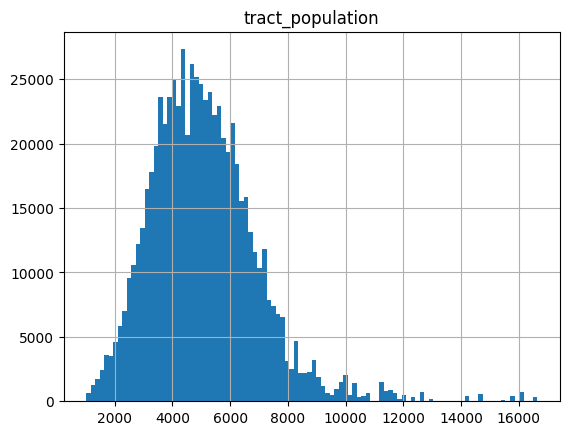

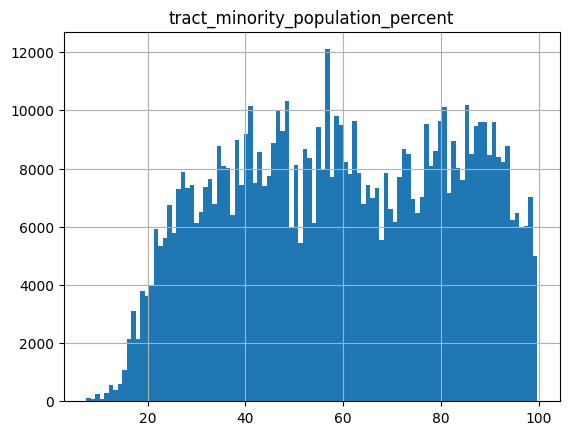

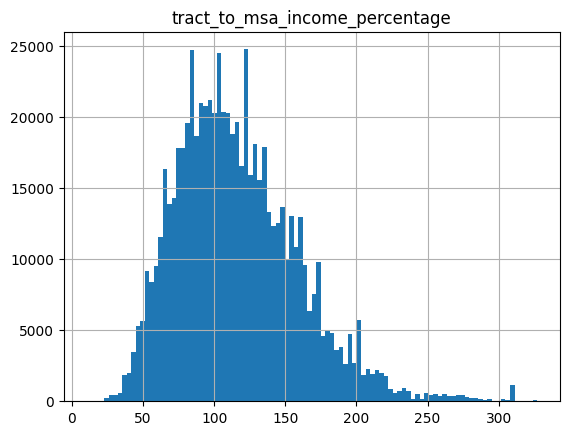

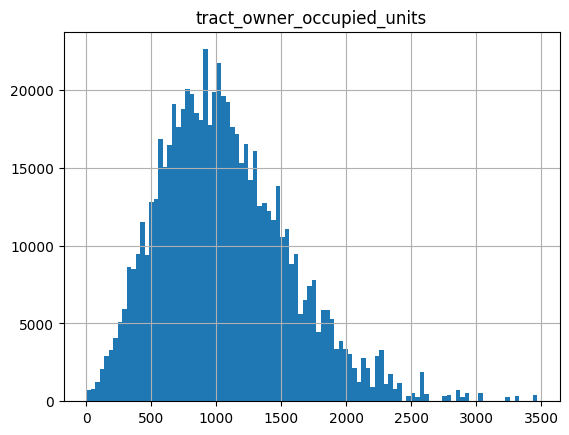

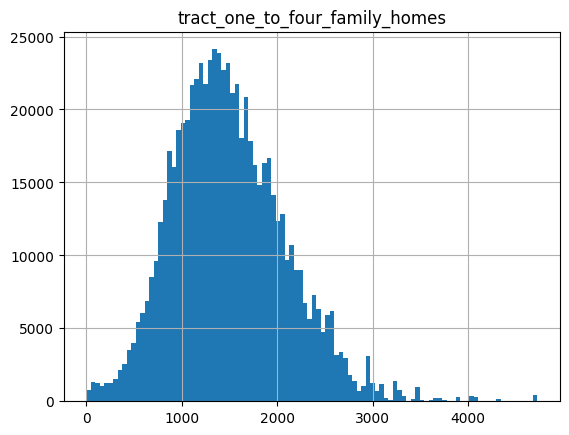

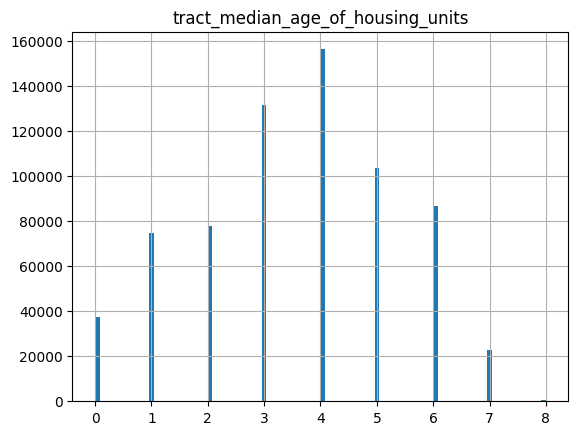

In [83]:
for c in [x for x in mapped_df.columns if x.startswith('tract')]:
    mapped_df[c].hist(bins=100)
    plt.title(c)
    plt.show()

In [84]:
mapped_df.reset_index(drop=True).to_csv('../../mapped_df.csv')